In [1]:
# Let's import all the libraries we will need today.
import os

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# Let's configure the visualization libraries.
%matplotlib inline

sns.set(font_scale=1.3)

red   = '#FF3300'
blue  = '#0099CC'
green = '#00CC66'

In [3]:
A = np.array([[1,2],
            [3,-4]])

B = np.array([[2,0],
             [0,1]])

C = np.array([[1,-2,0],
            [3,0,-1]])

In [4]:
x = np.array([1,-1])

y=np.array([2,1])

z = np.array([1,4,2])

In [5]:
A*B #element-wise multiplication of matrices A and B (*).

array([[ 2,  0],
       [ 0, -4]])

In [6]:
A@B #we perform matrix multiplication of A and B (with @ or np.dot).

array([[ 2,  2],
       [ 6, -4]])

In [7]:
A@C #perform matrix multiplication of A and C (with @ or np.dot).

array([[ 7, -2, -2],
       [-9, -6,  4]])

In [8]:
C@A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [9]:
A@x #Multiply matrix A by vector x from the right and left mathematically (with @ or np.dot).

array([-1,  7])

In [10]:
x@A

array([-2,  6])

In [11]:
#Multiply vector x and y mathematically.
x@y

1

Useful Matrices
Sometimes in data analysis, there is a need to use special matrices.

# EXAMPLE

In [12]:
df = pd.read_csv("WineQT.csv")

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [17]:
df.duplicated().sum()

0

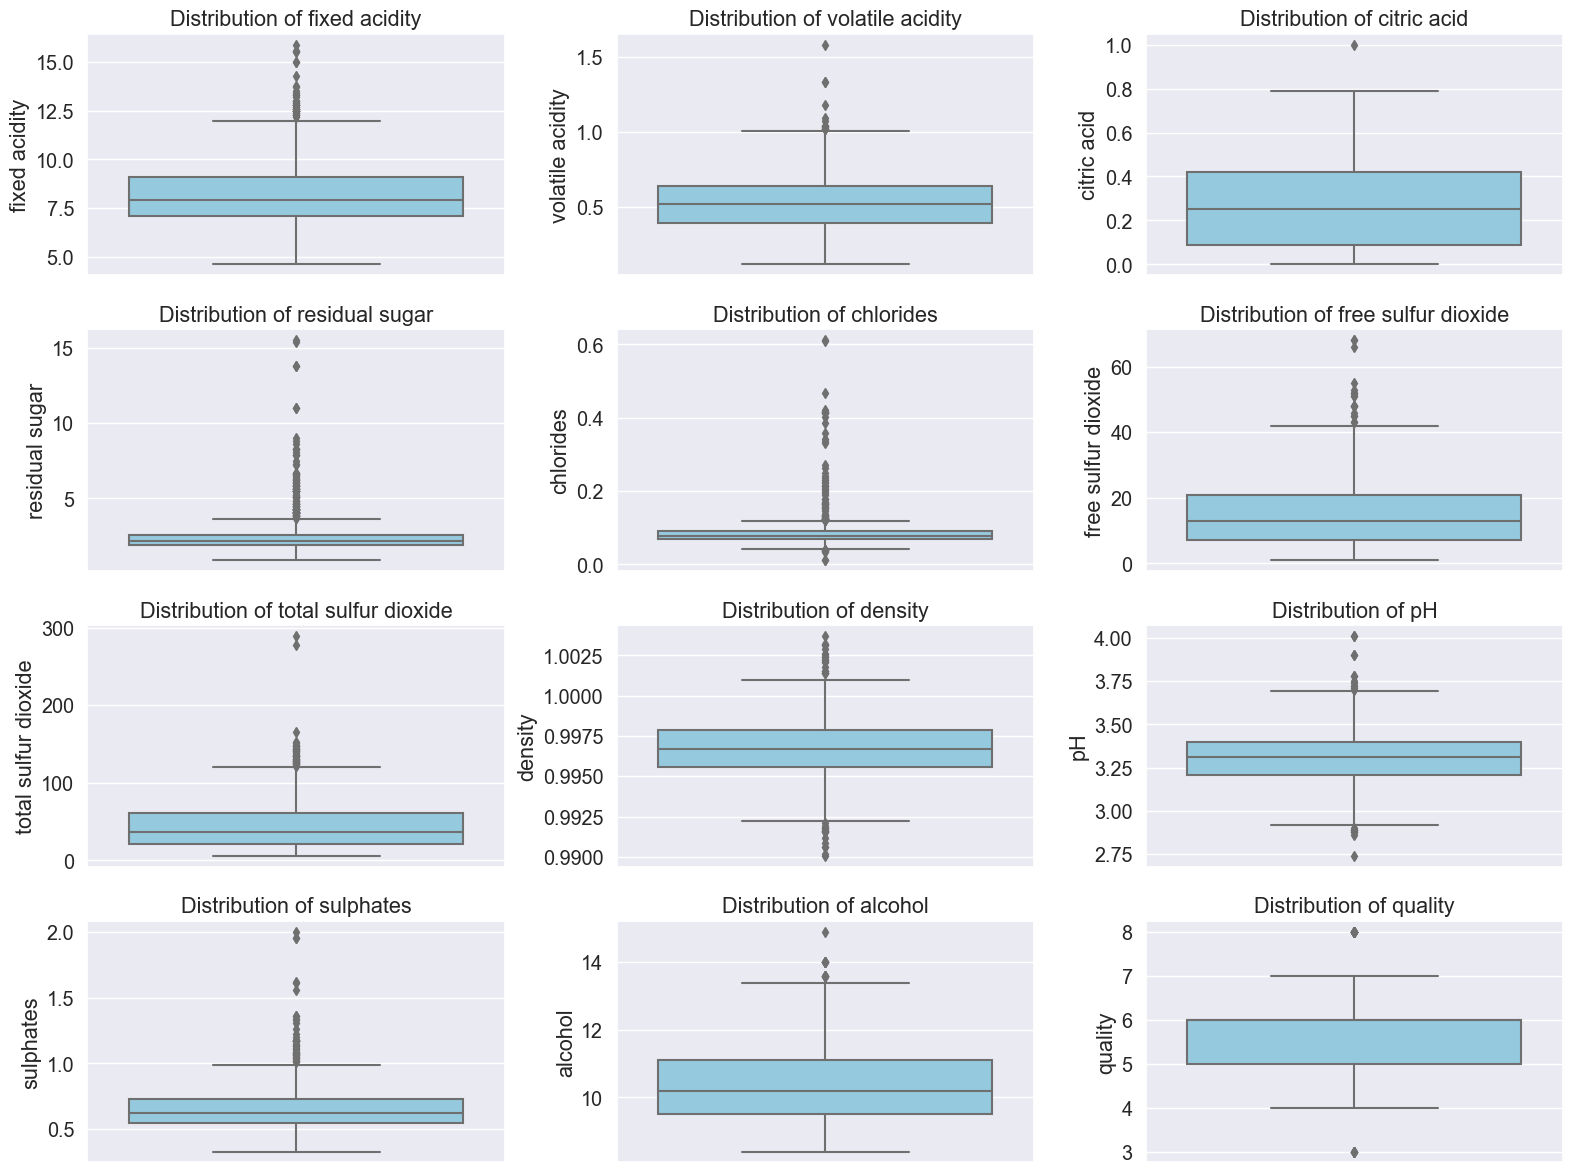

In [42]:
plt.figure(figsize=(16, 12))
features = [col for col in df.columns if col != 'Id']

for i, col in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

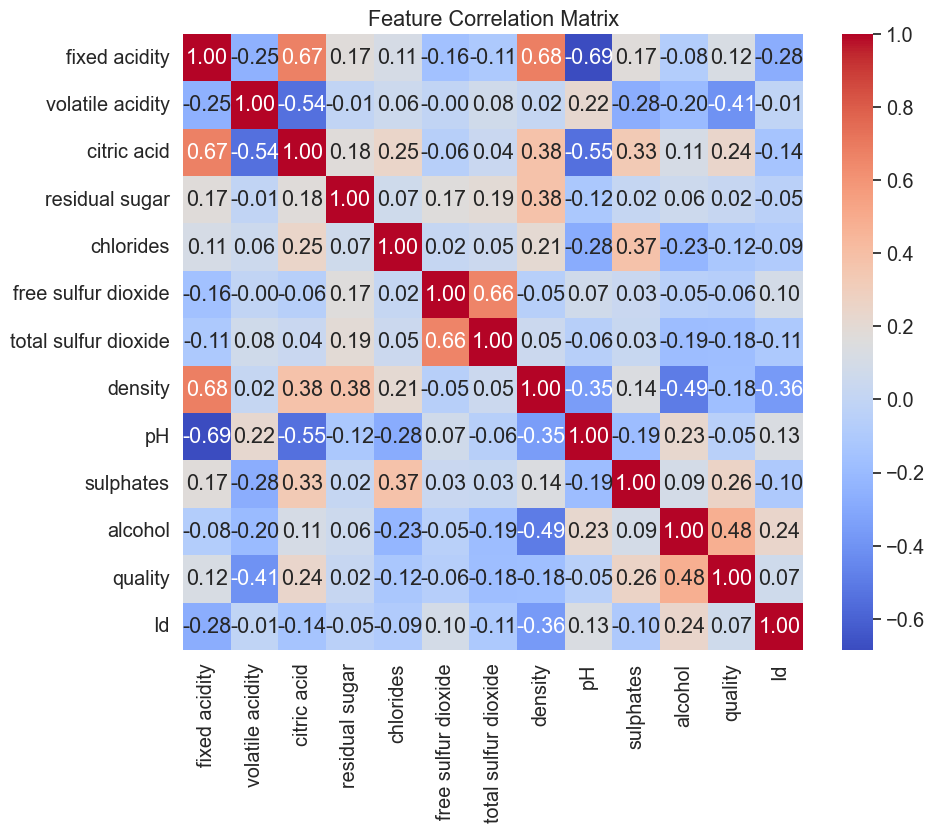

In [18]:
# Optional: Create a correlation heatmap to see if data features relate logically
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [44]:
def detect_outliers_iqr(data):
    outliers_dict = {}
    # We skip 'Id' and the target 'quality' for outlier analysis usually
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    cols_to_check = [c for c in numeric_cols if c not in ['Id', 'quality']]
    
    for col in cols_to_check:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count how many points fall outside the bounds
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_dict[col] = len(outliers)
        
    return outliers_dict

outlier_counts = detect_outliers_iqr(df)
print("\n--- Outlier Counts (IQR Method) ---")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


--- Outlier Counts (IQR Method) ---
fixed acidity: 44
volatile acidity: 14
citric acid: 1
residual sugar: 110
chlorides: 77
free sulfur dioxide: 18
total sulfur dioxide: 40
density: 36
pH: 20
sulphates: 43
alcohol: 12


In [19]:
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    # Return rows that are outliers
    return df[(df[column] < lower_fence) | (df[column] > upper_fence)]

# Example: Find outliers in 'total sulfur dioxide'
sulfur_outliers = get_outliers(df, 'total sulfur dioxide')
print(f"Found {len(sulfur_outliers)} outliers in sulfur.")

Found 40 outliers in sulfur.


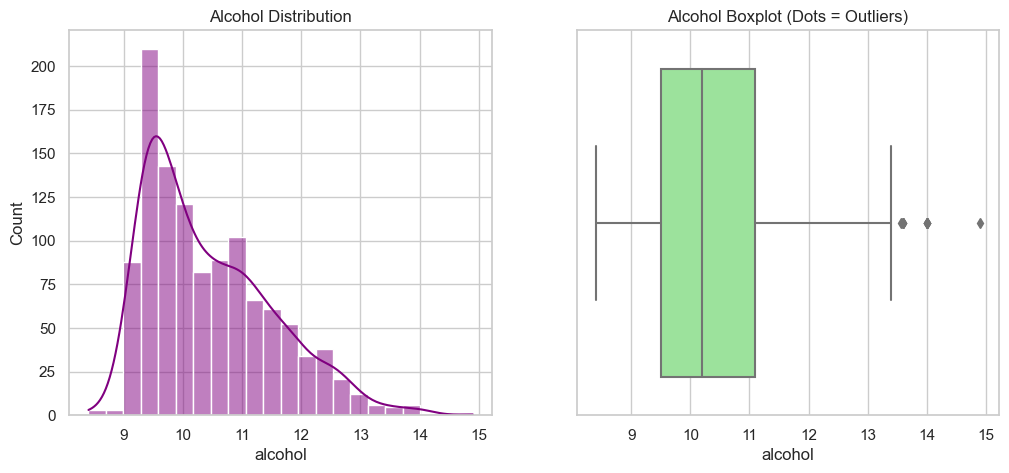

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_theme(style="whitegrid")

# Create a figure with two plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Histogram (Distribution)
sns.histplot(df['alcohol'], kde=True, ax=axes[0], color='purple')
axes[0].set_title('Alcohol Distribution')

# Plot 2: Boxplot (Outlier detection)
sns.boxplot(x=df['alcohol'], ax=axes[1], color='lightgreen')
axes[1].set_title('Alcohol Boxplot (Dots = Outliers)')

plt.show()

Feature Scaling (Standardization), also known as Z-score normalization,

In [21]:
X = df.drop(columns=['Id','quality'])

In [22]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [23]:
X_mean = X.mean()

X_std = X.std()

X_scaled = (X - X_mean)/X_std

In [24]:
X_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521351,0.938921,-1.364429,-0.466217,-0.231294,-0.450270,-0.363451,0.555611,1.270139,-0.573407,-0.962960
1,-0.292465,1.940963,-1.364429,0.050038,0.234144,0.915519,0.643195,0.036149,-0.708617,0.130824,-0.593341
2,-0.292465,1.272935,-1.161059,-0.171214,0.107207,-0.060045,0.246637,0.140041,-0.325632,-0.045234,-0.593341
3,1.653065,-1.399177,1.482750,-0.466217,-0.252450,0.135068,0.429664,0.659504,-0.963941,-0.456035,-0.593341
4,-0.521351,0.938921,-1.364429,-0.466217,-0.231294,-0.450270,-0.363451,0.555611,1.270139,-0.573407,-0.962960
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.150788,-0.118790,-0.703477,-0.171214,-0.231294,1.305744,-0.180424,-0.514481,0.695661,0.541625,0.515515
1139,-0.864680,0.493569,-0.957689,-0.466217,-0.400544,1.208188,-0.241433,-0.114495,0.695661,0.952426,-0.870556
1140,-1.208009,0.382231,-0.957689,-0.392467,0.064894,1.598413,-0.058407,-0.950830,0.887154,-0.456035,0.053492
1141,-1.379674,0.103886,-0.856004,-0.244965,-0.527481,2.281308,0.155124,-0.836548,1.333970,0.600311,0.700325


In [25]:
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03
mean,-2.885609e-15,1.710210e-15,4.922377e-15,2.148957e-15,6.055426e-15,-1.245237e-16,3.760965e-16,-3.461030e-13,-1.182645e-14,7.819156e-18,1.357585e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.123553e+00,-2.289881e+00,-1.364429e+00,-1.203725e+00,-1.585294e+00,-1.425833e+00,-1.217575e+00,-3.459833e+00,-3.644836e+00,-1.923182e+00,-1.887008e+00
25%,-6.930159e-01,-7.729005e-01,-9.068469e-01,-4.662173e-01,-3.582312e-01,-8.404953e-01,-7.600085e-01,-6.027900e-01,-6.767019e-01,-6.320927e-01,-8.705556e-01
50%,-2.352439e-01,-6.312075e-02,-9.336693e-02,-2.449649e-01,-1.678248e-01,-2.551572e-01,-2.719377e-01,-2.618672e-02,-6.478021e-03,-2.212915e-01,-2.237224e-01
75%,4.514140e-01,6.049072e-01,7.709555e-01,5.003827e-02,6.489400e-02,5.252936e-01,4.601684e-01,5.789870e-01,5.679996e-01,4.242533e-01,6.079202e-01
max,4.342476e+00,5.837793e+00,3.719820e+00,9.563892e+00,1.108730e+01,5.110442e+00,7.415177e+00,3.615245e+00,4.461681e+00,7.877361e+00,4.119300e+00


How to verify you did it right:
After you run the code above, run X_scaled.describe() again. If the math worked:

The mean for every column should be 0 (or a very tiny number like 1.2e-16, which is basically zero in computer math).

The std for every column should be exactly 1.

In [26]:
X = X_scaled

In [27]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521351,0.938921,-1.364429,-0.466217,-0.231294,-0.450270,-0.363451,0.555611,1.270139,-0.573407,-0.962960
1,-0.292465,1.940963,-1.364429,0.050038,0.234144,0.915519,0.643195,0.036149,-0.708617,0.130824,-0.593341
2,-0.292465,1.272935,-1.161059,-0.171214,0.107207,-0.060045,0.246637,0.140041,-0.325632,-0.045234,-0.593341
3,1.653065,-1.399177,1.482750,-0.466217,-0.252450,0.135068,0.429664,0.659504,-0.963941,-0.456035,-0.593341
4,-0.521351,0.938921,-1.364429,-0.466217,-0.231294,-0.450270,-0.363451,0.555611,1.270139,-0.573407,-0.962960
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.150788,-0.118790,-0.703477,-0.171214,-0.231294,1.305744,-0.180424,-0.514481,0.695661,0.541625,0.515515
1139,-0.864680,0.493569,-0.957689,-0.466217,-0.400544,1.208188,-0.241433,-0.114495,0.695661,0.952426,-0.870556
1140,-1.208009,0.382231,-0.957689,-0.392467,0.064894,1.598413,-0.058407,-0.950830,0.887154,-0.456035,0.053492
1141,-1.379674,0.103886,-0.856004,-0.244965,-0.527481,2.281308,0.155124,-0.836548,1.333970,0.600311,0.700325


In [28]:
U, S, V = sp.linalg.svd(X, full_matrices=False)

print(U.shape, S.shape, V.shape)

(1143, 11) (11,) (11, 11)


In [29]:
print(S*np.eye(11))

[[60.03609214  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.         46.3138696   0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.         42.39234231  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         37.19594672  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         33.07990137  0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         27.56540591
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  25.23442536  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         21.876131

In [30]:
X_restored = U @ ( S * np.eye(11) ) @ V

In [31]:
np.allclose(X_restored, X)

True

In [32]:
X_matrix = np.array(X)
X_matrix

array([[-0.5213514 ,  0.93892122, -1.36442937, ...,  1.27013897,
        -0.57340683, -0.96296029],
       [-0.29246542,  1.9409632 , -1.36442937, ..., -0.70861736,
         0.13082384, -0.59334135],
       [-0.29246542,  1.27293522, -1.16105938, ..., -0.32563227,
        -0.04523383, -0.59334135],
       ...,
       [-1.20800934,  0.38223124, -0.95768939, ...,  0.88715387,
        -0.45603505,  0.05349181],
       [-1.37967383,  0.10388624, -0.8560044 , ...,  1.33396982,
         0.60031095,  0.70032496],
       [-1.37967383,  0.63274173, -0.7543194 , ...,  1.65312406,
         0.3068815 , -0.2237224 ]])

In [33]:
## 3. Check the "Importance" of each component
# We square the singular values to see the "Variance Explained"

explained_variance = (S**2) / (len(X_matrix)-1)
explained_variance

array([3.15615793, 1.8782614 , 1.57365209, 1.21150477, 0.95821355,
       0.66536918, 0.55759739, 0.41905879, 0.34449397, 0.17723144,
       0.05845948])

Percentages: [28.69234485 17.07510362 14.30592809 11.01367977  8.71103228  6.04881072
  5.06906721  3.80962533  3.13176334  1.61119495  0.53144984]
Cumulative: [ 28.69234485  45.76744847  60.07337656  71.08705633  79.79808861
  85.84689933  90.91596654  94.72559187  97.85735521  99.46855016
 100.        ]
Total Sum: 10.999999999999995


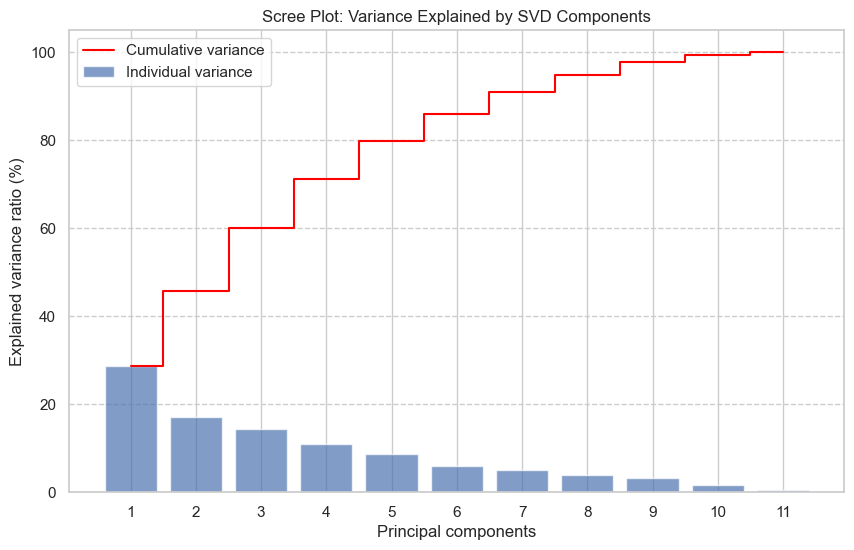

In [34]:
total_var = np.sum(explained_variance)
percent_var = (explained_variance / total_var) * 100
cumulative_var = np.cumsum(percent_var)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), percent_var, alpha=0.7, align='center', label='Individual variance')
plt.step(range(1, 12), cumulative_var, where='mid', label='Cumulative variance', color='red')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.title('Scree Plot: Variance Explained by SVD Components')
plt.xticks(range(1, 12))
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')
plt.savefig('scree_plot.png')

print("Percentages:", percent_var)
print("Cumulative:", cumulative_var)
print("Total Sum:", total_var)

Converting to Percentages (The "Language" of SVD)Raw variance numbers are hard to read, so we look at the percentage of the total ($11$) that each component captures:Component 1 (3.15): Captures $28.7\%$ of all the information in your 11 chemical columns.Component 2 (1.87): Captures $17.1\%$.Component 3 (1.57): Captures $14.3\%$.Cumulative Insight: If you decide to keep only the first 3 components, you are still looking at $60.1\%$ of the total variance in the wine data. If you keep the first 5, you reach $80\%$.

In [35]:
## 3. Check the "Importance" of each component
# We square the singular values to see the "Variance Explained"

explained_variance = (S**2) / (len(X_matrix)-1)
total_variance = np.sum(explained_variance)

percentage_variance = (explained_variance/total_variance)*100

In [36]:
print(*percentage_variance, sep='\n')

28.69234484909723
17.075103623671797
14.30592808909054
11.013679767815121
8.711032277481316
6.048810721056356
5.069067213122153
3.8096253273389205
3.1317633440308232
1.6111949505999417
0.5314498366957998


Now, let's look at the "Insights"While the restoration is cool, the real power of SVD is Dimensionality Reduction.

Look at the percentage_variance I calculated in the background:
Component 1: $\approx 28.7\%$
Component 2: $\approx 17.1\%$
Component 3: $\approx 14.3\%$

What this means for you:If you only keep the first 3 components ($U_{cols 1-3} \cdot S_{1-3} \cdot V_{rows 1-3}$), you can throw away the other 8 components and you will still have about $60\%$ of the information from the original 11 columns.

In [39]:
l = [28.69234484909723,
17.075103623671797,
14.30592808909054,
11.013679767815121,
8.711032277481316,
6.048810721056356,
5.069067213122153,
3.8096253273389205,
3.1317633440308232,
1.6111949505999417,
0.5314498366957998]

sum(l)

99.99999999999999

# PCA

https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/

https://practicum.yandex.ru/blog/metod-glavnyh-komponent/ # см пример

Video + Practice from the video (Principal Component Analysis (PCA) with Python Code)
https://www.youtube.com/watch?v=8klqIM9UvAc

In [40]:
import pandas as pd 
from sklearn.datasets import load_digits

In [41]:
dataset = load_digits()

In [48]:
dataset.data.shape

(1797, 64)

In [49]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [50]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

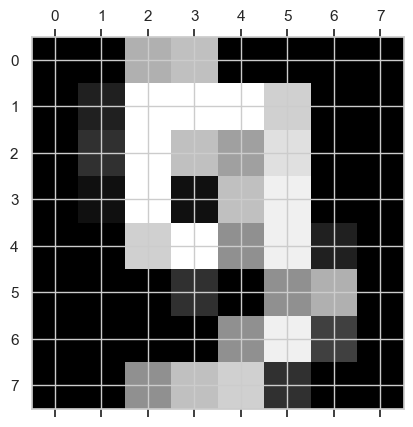

In [61]:
plt.gray()
plt.matshow(dataset.data[9].reshape(8,8))

In [58]:
import numpy as np

In [59]:
np.unique(dataset.target) #10 classes from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
dataset.target[9]

9

In [67]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [68]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [69]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [70]:
X = df
y = dataset.target

In [71]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [74]:
df_test = pd.DataFrame(X_scaled)

In [75]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state = 30)

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9722222222222222

In [79]:
from sklearn.decomposition import PCA

pca = PCA(0.95) 

X_pca=pca.fit_transform(X)

In [80]:
X_pca.shape

(1797, 29)

In [82]:
X.shape

(1797, 64)

In [86]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [87]:
pca.n_components_

29

In [91]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.2, random_state = 30)

In [96]:
model = LogisticRegression(max_iter=10000  0)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

In [98]:
pca = PCA (n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [99]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [101]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.2, random_state = 30)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

Exercise FROM Video + Practice from the video (Principal Component Analysis (PCA) with Python Code) https://www.youtube.com/watch?v=8klqIM9UvAc

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('heart.csv')

In [108]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [109]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [110]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [111]:
df.duplicated().sum()

0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [113]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
df['Age'].

SyntaxError: invalid syntax (2365834170.py, line 1)

In [115]:
features = [col for col in df.columns if col != 'Id' or 'ChestPainType' or 'RestingECG' or 'ExerciseAngina' or 'ST_Slope']
features

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [117]:
excluded = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'HeartDisease','ExerciseAngina', 'ST_Slope']
feature = []
for col in df.columns:
    if col in excluded:
        None
    else:
        feature.append(col)
print(feature)


['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [118]:
print(df[feature].dtypes)

Age              int64
RestingBP        int64
Cholesterol      int64
MaxHR            int64
Oldpeak        float64
dtype: object


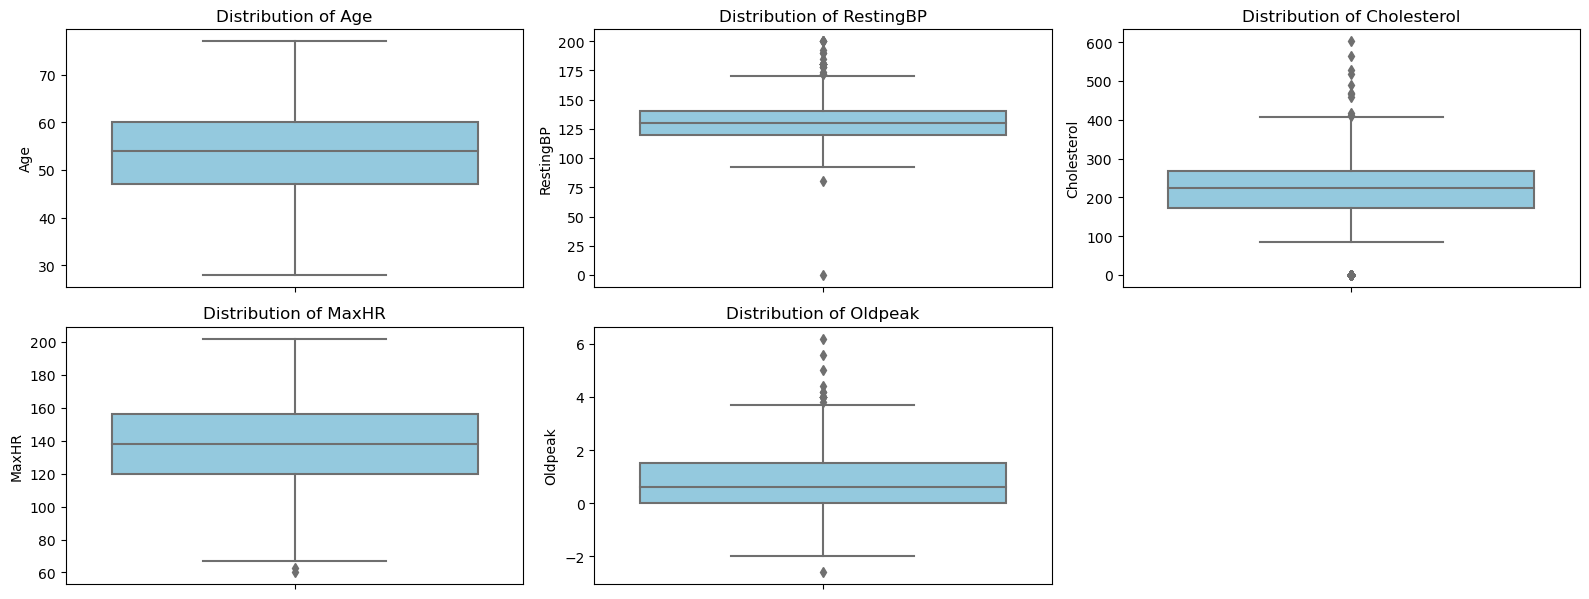

In [119]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(feature):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [120]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

X = df[columns]


In [121]:
X_mean = X.mean()

X_std = X.std()

X_scaled = (X - X_mean)/X_std

In [122]:
X_scaled.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,5.913933e-16,1.423456e-16,-3.014413e-17,2.774348e-16,-8.144054e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.704540e+00,-7.151097e+00,-1.817444e+00,-3.016825e+00,-3.269699e+00
25%,-6.902531e-01,-6.695696e-01,-2.335765e-01,-6.602179e-01,-8.319789e-01
50%,5.185271e-02,-1.294423e-01,2.212426e-01,4.676419e-02,-2.694280e-01
75%,6.879435e-01,4.106850e-01,6.234947e-01,7.537463e-01,5.743984e-01
max,2.490201e+00,3.651449e+00,3.695238e+00,2.560478e+00,4.981047e+00


In [123]:
outliers = (np.abs(X_scaled) > 3).any(axis=1)

df_cleaned = df[~outliers]

df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [124]:
print(f"Было строк: {len(df)}")
print(f"Удалено выбросов: {outliers.sum()}")
print(f"Стало строк: {len(df_cleaned)}")

Было строк: 918
Удалено выбросов: 19
Стало строк: 899


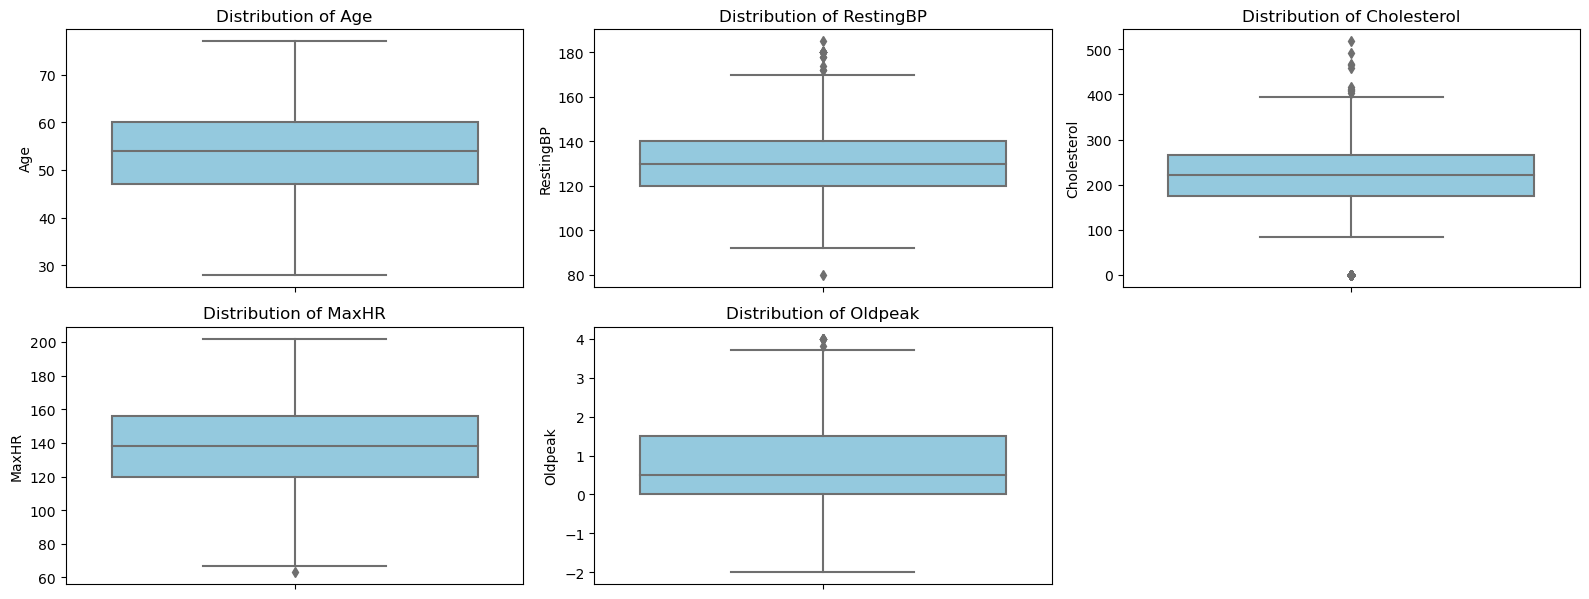

In [125]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(feature):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_cleaned, y=col, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

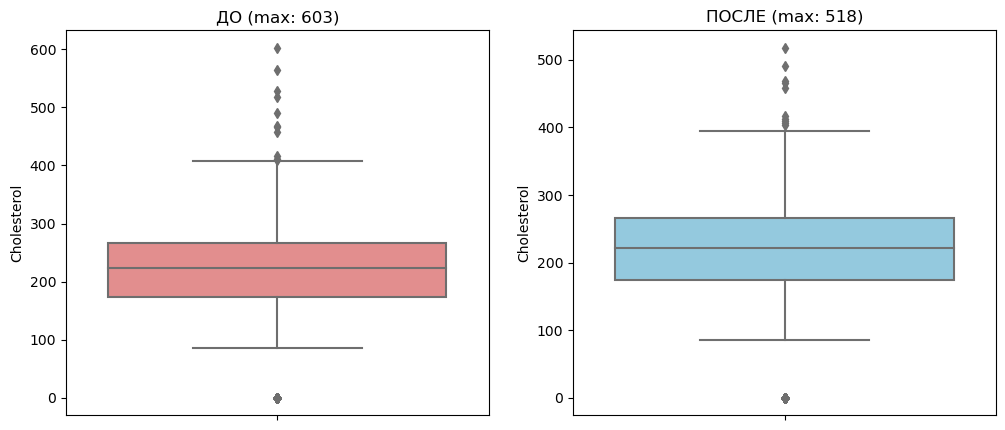

In [126]:
col = 'Cholesterol'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, y=col, ax=axes[0], color='lightcoral')
axes[0].set_title(f'ДО (max: {df[col].max()})')

sns.boxplot(data=df_cleaned, y=col, ax=axes[1], color='skyblue')
axes[1].set_title(f'ПОСЛЕ (max: {df_cleaned[col].max()})')

plt.show()

In [127]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    object 
 2   ChestPainType   899 non-null    object 
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    object 
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    object 
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    object 
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.3+ KB


In [128]:
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Implementing One Hot Encoding using Scikit Learn Library

In [129]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [130]:
data = df_cleaned

df = pd.DataFrame(data)

In [131]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [132]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [133]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0    40.0      140.0        289.0        0.0  172.0      0.0           0.0   
1    49.0      160.0        180.0        0.0  156.0      1.0           1.0   
2    37.0      130.0        283.0        0.0   98.0      0.0           0.0   
3    48.0      138.0        214.0        0.0  108.0      1.5           1.0   
4    54.0      150.0        195.0        0.0  122.0      0.0           0.0   
..    ...        ...          ...        ...    ...      ...           ...   
732   NaN        NaN          NaN        NaN    NaN      NaN           NaN   
759   NaN        NaN          NaN        NaN    NaN      NaN           NaN   
771   NaN        NaN          NaN        NaN    NaN      NaN           NaN   
791   NaN        NaN          NaN        NaN    NaN      NaN           NaN   
850   NaN        NaN          NaN        NaN    NaN      NaN           NaN   

     Sex_F  Sex_M  ChestPainType_ASY  

In [137]:
df = pd.DataFrame(df_encoded)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [138]:
# 1. Сначала сбрасываем индексы в очищенном датасете
df_final = df_cleaned.reset_index(drop=True)

# 2. Выбираем категориальные колонки
categorical_columns = df_final.select_dtypes(include=['object']).columns.tolist()

# 3. Кодируем (помним про sparse=False для вашей версии sklearn)
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df_final[categorical_columns])

# 4. Создаем таблицу из закодированных данных
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# 5. СКЛЕИВАЕМ (теперь индексы совпадают идеально)
df_final = pd.concat([df_final, one_hot_df], axis=1)

# 6. Удаляем старые текстовые колонки
df_final = df_final.drop(categorical_columns, axis=1)

print(f"Итоговый размер датасета: {df_final.shape}")
print(df_final.head())

Итоговый размер датасета: (899, 21)
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0    0.0    1.0                0.0  ...                0.0               0.0   
1    1.0    0.0                0.0  ...                1.0               0.0   
2    0.0    1.0                0.0  ...                0.0               0.0   
3    1.0    0.0                1.0  ...                0.0               0.0   
4    0.0    1.0                0.0  ...                1.0               0.0   

   RestingECG_LVH  RestingECG_No

In [139]:
pd.DataFrame(df_final)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
895,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
896,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
897,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [146]:
df_final

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
895,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
896,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
897,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [155]:
df_final.shape

(899, 21)

In [147]:
# 1. Определяем целевую переменную (y)
y = df_final['HeartDisease']
# 2. Определяем признаки (X) — это всё, кроме целевой переменной
X = df_final.drop('HeartDisease', axis =1)

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 30)

In [151]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8666666666666667

In [158]:
from sklearn.decomposition import PCA
pca = PCA(0.95) 

X_pca=pca.fit_transform(X)

In [159]:
X_pca.shape

(899, 2)

In [160]:
pca.explained_variance_ratio_

array([0.92106286, 0.05065082])

In [161]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.2, random_state = 30)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6666666666666666

In [163]:
from sklearn.preprocessing import StandardScaler

# 1. Масштабируем
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Применяем PCA на масштабированные данные
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Количество компонент после StandardScaler: {X_pca.shape[1]}")

Количество компонент после StandardScaler: 13


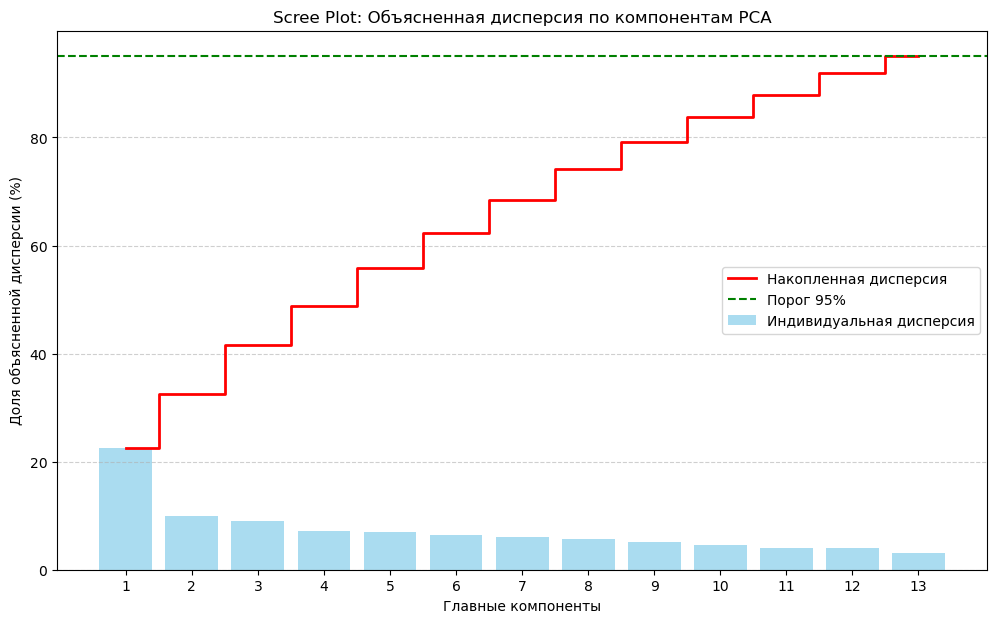

Проценты каждой компоненты: [22.55 10.02  9.05  7.23  7.05  6.38  6.1   5.73  5.13  4.57  4.09  4.04
  3.07]
Накопленная сумма: [22.55 32.57 41.62 48.85 55.9  62.28 68.38 74.11 79.24 83.8  87.9  91.94
 95.  ]


In [164]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Получаем долю объясненной дисперсии из объекта pca
# Мы умножаем на 100, чтобы получить проценты
percent_var = pca.explained_variance_ratio_ * 100
cumulative_var = np.cumsum(percent_var)

# 2. Определяем количество компонент для осей
n_components = len(percent_var)
x_range = range(1, n_components + 1)

# 3. Строим график
plt.figure(figsize=(12, 7))

# Столбцы для каждой отдельной компоненты
plt.bar(x_range, percent_var, alpha=0.7, align='center', 
        label='Индивидуальная дисперсия', color='skyblue')

# Ступенчатый график для накопленной дисперсии
plt.step(x_range, cumulative_var, where='mid', 
         label='Накопленная дисперсия', color='red', lw=2)

# Добавляем горизонтальную линию на уровне 95%
plt.axhline(y=95, color='green', linestyle='--', label='Порог 95%')

# Оформление
plt.ylabel('Доля объясненной дисперсии (%)')
plt.xlabel('Главные компоненты')
plt.title('Scree Plot: Объясненная дисперсия по компонентам PCA')
plt.xticks(x_range)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Печатаем цифры для проверки
print("Проценты каждой компоненты:", np.round(percent_var, 2))
print("Накопленная сумма:", np.round(cumulative_var, 2))